<a href="https://colab.research.google.com/github/sabhierfan/obj-detection-using-rcnn/blob/main/fast_rcnn_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Detectron2
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
!pip install git+https://github.com/facebookresearch/detectron2.git

  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-l9rm040u
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-l9rm040u
  Resolved https://github.com/facebookresearch/fvcore.git to commit 70e69fb3ff7a82631f6a82061a7650c4f11da876
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.6-py3-none-any.whl size=65635 sha256=0b2b9fb3ef6452cdee21b98e692a73914817c5aee9b96569ac5a85ce5d21b262
  Stored in directory: /tmp/pip-ephem-wheel-cache-34lmruwu/wheels/f0/0c/4f/d358b3fbbc075812561fc600352afc7c17c6fb223304e39d97
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=4d7da44f2ce316117a013490a9cff9f69c5da5465977212e43c7c65da40515d3
  Stored in directory: /root/.cache/pip/wheels/7c/96/04/4f5f31ff812f684f69f40cb16343

In [2]:
!pip install pycocotools

In [3]:
import torch
import torchvision
import cv2
import numpy as np
import os
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [4]:
# Download COCO dataset
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip val2017.zip
!unzip annotations_trainval2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/00000019

In [5]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_280758.pkl: 167MB [00:01, 121MB/s]                           


In [13]:
# Load an example image
image_path = '/content/download (1).jpeg'  # Change this to your image path

# Check if the image file exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    im = cv2.imread(image_path)

    # Run the predictor
    outputs = predictor(im)

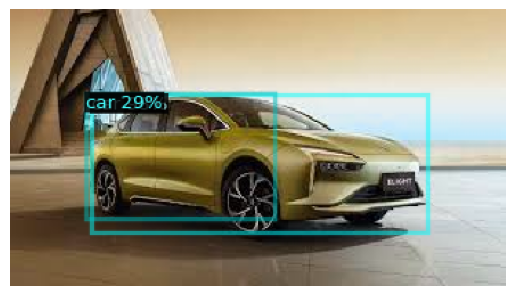

In [14]:
import matplotlib.pyplot as plt
# Visualize predictions
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

# Convert image to RGB and display using matplotlib
plt.imshow(out.get_image()[:, :, ::-1])
plt.axis('off')
plt.show()

In [9]:
def calculate_iou(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    # return the intersection over union value
    return iou

In [10]:
import time

# Measure inference speed
start_time = time.time()
outputs = predictor(im)
end_time = time.time()

inference_time = end_time - start_time
fps = 1.0 / inference_time
print("Inference time: {:.4f} seconds".format(inference_time))
print("Inference speed: {:.2f} FPS".format(fps))

Inference time: 0.2262 seconds
Inference speed: 4.42 FPS
